In [3]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import sem, t

ratings_data = pd.read_csv("ml-latest-small\\ratings.csv")  
movie_names = pd.read_csv("ml-latest-small\\movies.csv")  
movie_data = pd.merge(ratings_data, movie_names, on='movieId')  
movie_data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [58]:
data = {'numbers':[2,5,6,7,8]}
df = pd.DataFrame(data)
n = len(df)
m = df['numbers'].mean()
x = 0
for i in df['numbers']:
    x += (i - m)**2

variance = x / (n-1)
sd = variance**(0.5)

sd_of_sd = sd / n**0.5
print sd, sd_of_sd


2.30217288664 1.0295630141


In [75]:
#https://en.wikipedia.org/wiki/Confidence_interval
#othman
confidence = 0.9
def confidence_interval(data):
    n = len(data)
    mean = data.mean()
    std_err = sem(data)
    x = 0
    for i in data:
        x += (i - mean)**2
    
    if(n>1):
        variance = x / (n-1)
        sd = variance**(0.5)
        sd_of_sd = sd / n**0.5
#         print sd_of_sd
#         print std_err
    
    # multiply sd by t value (takes degrees of freedom and confidence interval to find value)
    return std_err * t.ppf((1 + confidence) / 2, n - 1)
    
    
ratings = pd.DataFrame(movie_data.groupby('title')['rating'].mean()) 
ratings['count']= pd.DataFrame(movie_data.groupby('title')['rating'].count())
ratings['error']= pd.DataFrame(movie_data.groupby('title')['rating'].apply(confidence_interval)) 
# how can write a function that takes the values of another column in the dataframe to make a calculation. 
# I would like to find a way to write a function to calculate all the attributes and write them into different columns. 
# ratings['start'] = ratings['rating'] - ratings['h']
# ratings['end'] = ratings['rating'] + ratings['h']
# ratings['interval'] = ratings['end'] - ratings['start']
ratings['variance'] = pd.DataFrame(movie_data.groupby('title')['rating'].var())

# remove all values with error value less than zero 
ratings = ratings[ratings['error']>0]

In [70]:
ratings.sort_values(by=['error']).tail()

,rating,count,error,variance
title,,,,
Kwaidan (Kaidan) (1964),2.50,2,12.627503,8.000
Emma (2009),2.50,2,12.627503,8.000
Lassie (1994),3.00,2,12.627503,8.000
Ivan's Childhood (a.k.a. My Name is Ivan) (Ivanovo detstvo) (1962),2.75,2,14.205941,10.125
Fanny and Alexander (Fanny och Alexander) (1982),2.75,2,14.205941,10.125


(Text(0.5,0,'Count'), Text(0,0.5,'error'))

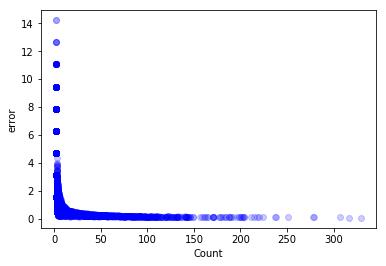

In [71]:
plt.scatter(ratings['count'], ratings['error'], c='b', alpha=0.2)
plt.xlabel('Count'), plt.ylabel('error')

(Text(0.5,0,'Variance'), Text(0,0.5,'error'))

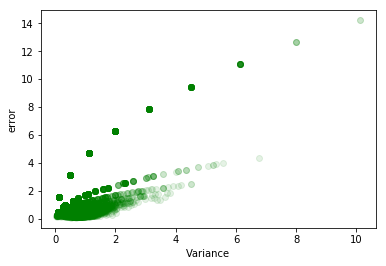

In [72]:
plt.scatter(ratings['variance'], ratings['error'], c='g', alpha=0.1)
plt.xlabel('Variance'), plt.ylabel('error')

(Text(0.5,0,'Variance'), Text(0,0.5,'error'))

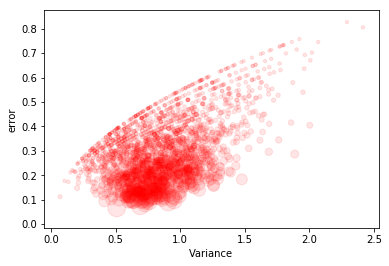

In [73]:
ratings = ratings[ratings['count']>10]
plt.scatter(ratings['variance'], ratings['error'], s=ratings['count'], c='r', alpha=0.1)
plt.xlabel('Variance'), plt.ylabel('error')